# JumpStart: Natural  Language Processing

**Objective:** A general introduction to basic NLP methods to serve as a foundation for further self study and additional NLP curriculums. This notebook intends to serve as a basis for various techniques such as text processing, information retrieval, and classifying text.

- The Reddit dataset we will use today comes from Google BigQuery. You can find it [here](https://bigquery.cloud.google.com/table/fh-bigquery:reddit_posts.2018_05?pli=1).
 - The data is public but you need to have an active account on Google Clound Platform first in order to access it.
- The original data was huge so we sampled it from the top 10 subreddit.

- We will also learn the following NLP packages in Python along the way

 - [NLTK](http://www.nltk.org/) - a very popular package for doing NLP in Python

 - [Textblob](https://textblob.readthedocs.io/en/dev/) - similar to NLTK but provides a higher level API for easy accessing.

 - [WordCloud](https://github.com/amueller/word_cloud) - how to run wordcloud in Python

## Prerequisite

- Open your **Terminal/Anaconda Prompt**, cd to the lecture code folder and run the following command:
 - `pip install -r requirements.txt`

- After installing all the required packages, run the following command:
 - `python -m textblob.download_corpora`
 
- Restart this jupyter notebook.

In [3]:
import nltk

# Uncomment the following line the first time you run the code
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\nates\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\nates\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

## Load Dataset

In [30]:
import pandas as pd
df = pd.read_csv(r'C:\Users\nates\Documents\iTalkiScrape\teacherData.csv')

- It is always a good idea to check the shape of the dataframe and column types before you run any type of operation.

In [5]:
df.shape

(368, 23)

In [6]:
df.dtypes

Hi there, My name is daniel walter, I am a native english speaker From Brownsville Texas, i'm an english teacher and i have a degree in educations and graduated from Siena Heights University in Michigan.                                                                                                                          object
I have taught for 2 years as an ESL online english tutor Preparing students for english tests such as TOEFL, IELTS, SAT, and CEP,  i also teach English business conversations, Aviation classes, general conversations, grammars, vocabularies and fluency.                                                                         object
I love to teach adapting to the pace of my students  so we can both obtain a positive result at the end of every session, i love to teach using body language or sign demonstrations, games, and quick methods that help my students faster and i love using interest of my students to make the class entertaining and lovable.     object
http

- When you first readin a dataset, I would recommend using `df.sample()` rather than `df.head()` because sometimes the first couple rows are fine, however, there might be missing values or mixed types in the column so it is better if you can get a big picture of the whole dataset.

In [ ]:
df.sample(10)

- `selftext` is the raw text of each Reddit post. But take a look at the column. There are missing values, `[deleted]`, `[removed]` which should not be considered as valid text.
- We need to clean the text before we can further analyze it.

In [3]:
df.head()

,About_Me,Me_as_a_Teacher,My_Lessons_&_Teaching_Style,URL,Avg_Rating,Lessons,Students,A,B,C,...,G,H,I,J,K,L,M,N,O,P
0,"Hi there, My name is daniel walter, I am a nat...",I have taught for 2 years as an ESL online eng...,I love to teach adapting to the pace of my stu...,https://www.italki.com/teacher/6313078/english,4.9,24 LESSONS,12 STUDENTS,24,11,4,...,301,301,31,35,35,35,0,0,0,0
1,What I can help you with:\nimproving your pron...,I have helped several students prepare for IEL...,My lessons are tailored to each student so we ...,https://www.italki.com/teacher/5309772/english,5.0,909 LESSONS,287 STUDENTS,909,25,33,...,77,77,50,45,0,0,10,4,0,0
2,"I am a hardworking, enthusiastic and entertain...",I am a confident person.I try to do the best t...,I always make sure to break down the hardest o...,https://www.italki.com/teacher/6982216/english,5.0,298 LESSONS,54 STUDENTS,298,12,113,...,139,139,64,64,64,64,14,14,14,14
3,¡Hola! Mi nombre es Karen y soy peruana. Vivo ...,Me agrada mucho interactuar con personas y apr...,Me gusta que mis clases sean interactivas. Nor...,https://www.italki.com/teacher/4773185/english,5.0,181 LESSONS,41 STUDENTS,182,5,37,...,172,172,146,146,146,146,18,18,18,18
4,Check out my Youtube for pronunciation/speakin...,I have 7 years teaching students learning Engl...,All classes are customized to student needs. H...,https://www.italki.com/teacher/2641270/english,5.0,5289 LESSONS,794 STUDENTS,5289,175,162,...,134,132,0,9,29,45,60,54,33,19


- After cleansing the data, about 88% of our `selftext` column are just empty string.
- It makes sense to concatenate the text with its title.

In [ ]:
print(sum(df['selftext'] == '') / df.shape[0])

In [ ]:
df['selftext'] = df['title'] + ' ' + df['selftext']

In [ ]:
df.sample(10)

## Preprocessing

- Convert all the text to lowercase - avoids having multiple copies of the same words.
- Replace url in the text with empty space.
- Replace all empty spaces with just one.

In [31]:
import re


colls = list(df.columns)[0:3]
for coll in colls:
    df[coll] = df[coll].fillna('')
    df[coll] = df[coll].str.lower()    
    df[coll] = df[coll].apply(lambda x: re.sub('\s+', ' ', x))
    df[coll] = df[coll].apply(lambda x: re.sub('/[^a-z\d ]+/i', '', x))
    df[coll] = df[coll].apply(lambda x: re.sub('[^\w\s]', '', x))
    
    

In [24]:
df.head(20)

,About_Me,Me_as_a_Teacher,My_Lessons_&_Teaching_Style,URL,Avg_Rating,Lessons,Students,A,B,C,...,G,H,I,J,K,L,M,N,O,P
0,hi there my name is daniel walter i am a nativ...,i have taught for 2 years as an esl online eng...,i love to teach adapting to the pace of my stu...,https://www.italki.com/teacher/6313078/english,4.9,24 LESSONS,12 STUDENTS,24,11,4,...,301,301,31,35,35,35,0,0,0,0
1,what i can help you with improving your pronun...,i have helped several students prepare for iel...,my lessons are tailored to each student so we ...,https://www.italki.com/teacher/5309772/english,5.0,909 LESSONS,287 STUDENTS,909,25,33,...,77,77,50,45,0,0,10,4,0,0
2,i am a hardworking enthusiastic and entertaini...,i am a confident personi try to do the best th...,i always make sure to break down the hardest o...,https://www.italki.com/teacher/6982216/english,5.0,298 LESSONS,54 STUDENTS,298,12,113,...,139,139,64,64,64,64,14,14,14,14
3,hola mi nombre es karen y soy peruana vivo en ...,me agrada mucho interactuar con personas y apr...,me gusta que mis clases sean interactivas norm...,https://www.italki.com/teacher/4773185/english,5.0,181 LESSONS,41 STUDENTS,182,5,37,...,172,172,146,146,146,146,18,18,18,18
4,check out my youtube for pronunciationspeaking...,i have 7 years teaching students learning engl...,all classes are customized to student needs ho...,https://www.italki.com/teacher/2641270/english,5.0,5289 LESSONS,794 STUDENTS,5289,175,162,...,134,132,0,9,29,45,60,54,33,19
5,皆さんこんにちはキムと申しますホーチミン市に滞在しているベトナム人の社会人です日本語検定n1...,i now have more than 2 years experience teachi...,my methodologies are tailored to what works be...,https://www.italki.com/teacher/4246858/english,5.0,485 LESSONS,86 STUDENTS,485,35,103,...,307,307,6,8,19,21,16,21,10,8
6,hello my name is aneli and i am english and fr...,i have many years of teaching experience in va...,my lesson consists of four parts listening spe...,https://www.italki.com/teacher/6989583/english,5.0,190 LESSONS,17 STUDENTS,190,29,51,...,96,96,38,38,38,38,20,20,20,20
7,日本語 こんにちは日本語と英語講師の俊介です 私は人と話すこと聞くこと教えることが大好きです...,日本語 今まで日本の大手英会話スクールの講師として子供から大人まで１年3ヶ月英語を教えていま...,my lessons are mainly focused on communication...,https://www.italki.com/teacher/5800129/english,5.0,1294 LESSONS,162 STUDENTS,1296,158,136,...,215,215,44,99,109,113,53,22,12,8
8,,,,https://www.italki.com/teacher/4659772/english,5.0,105 LESSONS,28 STUDENTS,105,0,0,...,71,71,6,6,6,6,5,0,0,0
9,my name is ali and i am from california i have...,as a community teacher i see myself improving ...,i have a plan for different levels if a studen...,https://www.italki.com/teacher/7214797/english,5.0,505 LESSONS,146 STUDENTS,505,0,35,...,79,79,12,57,114,120,119,63,24,18


- Let's take a look at the dataframe after preprocessing.

In [ ]:
df.sample(10)

## Text Processing Steps and Methods

- Before we start using machine learning methods on our text, there are some steps that we first want to perform so that our text is in a format that our model can interpret.
- These steps include:
 - Filtering
 - Tokenization
 - Stemming
 - Lemmitization

## Filtering

- The first step is to remove punctuation, as it doesn’t add any extra information while treating text data. Therefore removing all instances of it will help us reduce the size of the training data.

- When examining a text, often there are words used within a sentence that holds no meaning for various data mining operations such as topic modeling or word frequency. 
    - Examples of this include "the", "is", etc. Collectively, these are known as "stopwords". 
- When mining for certain information, you should note whether your method should remove certain stopwords (for example, wordclouds). To illustrate an example, we will call upon the stopwords method from nltk. 
- Note, methods that interact with the text itself is usually found under nltk.corpus. Corpus is the linguistics term for set of structured text used for statistical study so be mindful of this specific vocabulary.
- The stop words from nltk is just a Python list so you can easily append more stopwords to it. For example "computer" would be a stopword in corpus largely dealing with data science.

In [32]:
from nltk.corpus import stopwords
stop = stopwords.words('english')
print(stop)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [33]:
for coll in colls:
    df[coll] = df[coll].apply(lambda text: " ".join(word for word in text.split() if word not in stop))

## Tokenization 

- Tokenization is the act of splitting text into a sequence of words. In this example, we will try a simplistic tokenization method below using the standard split.

In [34]:
#sample_text = "This is a toy example. Illustrate this example below."
#sample_tokens = sample_text.split()
#print(sample_tokens)
from textblob import TextBlob
for coll in colls:
    df[str(coll + 'word_list')] = df[coll].apply(lambda x: TextBlob(x).words)
    

- Did you notice something? While we have the tokens, "example" and "example." are treated as different tokens. As a NLP data scientist, you must make the choice on whether you choose to distinguish the two.

- Note, various packages in Python such as the nltk package will default tokenize "." as a seperate token instead to designate it it's own special meaning. This can be illustrated below:

In [15]:
#from nltk.tokenize import word_tokenize 
#word_tokenize(sample_text)

df.head(20)

,About_Me,Me_as_a_Teacher,My_Lessons_&_Teaching_Style,URL,Avg_Rating,Lessons,Students,A,B,C,...,J,K,L,M,N,O,P,About_Meword_list,Me_as_a_Teacherword_list,My_Lessons_&_Teaching_Styleword_list
0,hi name daniel walter native english speaker b...,taught 2 years esl online english tutor prepar...,love teach adapting pace students obtain posit...,https://www.italki.com/teacher/6313078/english,4.9,24 LESSONS,12 STUDENTS,24,11,4,...,35,35,35,0,0,0,0,"[hi, name, daniel, walter, native, english, sp...","[taught, 2, years, esl, online, english, tutor...","[love, teach, adapting, pace, students, obtain..."
1,help improving pronunciation general fluency e...,helped several students prepare ielts familiar...,lessons tailored student start whatever level ...,https://www.italki.com/teacher/5309772/english,5.0,909 LESSONS,287 STUDENTS,909,25,33,...,45,0,0,10,4,0,0,"[help, improving, pronunciation, general, flue...","[helped, several, students, prepare, ielts, fa...","[lessons, tailored, student, start, whatever, ..."
2,hardworking enthusiastic entertaining personi ...,confident personi try best make lessons real r...,always make sure break hardest concepts easies...,https://www.italki.com/teacher/6982216/english,5.0,298 LESSONS,54 STUDENTS,298,12,113,...,64,64,64,14,14,14,14,"[hardworking, enthusiastic, entertaining, pers...","[confident, personi, try, best, make, lessons,...","[always, make, sure, break, hardest, concepts,..."
3,hola mi nombre es karen soy peruana vivo en li...,agrada mucho interactuar con personas aprender...,gusta que mis clases sean interactivas normalm...,https://www.italki.com/teacher/4773185/english,5.0,181 LESSONS,41 STUDENTS,182,5,37,...,146,146,146,18,18,18,18,"[hola, mi, nombre, es, karen, soy, peruana, vi...","[agrada, mucho, interactuar, con, personas, ap...","[gusta, que, mis, clases, sean, interactivas, ..."
4,check youtube pronunciationspeakingielts writi...,7 years teaching students learning english ser...,classes customized student needs however basic...,https://www.italki.com/teacher/2641270/english,5.0,5289 LESSONS,794 STUDENTS,5289,175,162,...,9,29,45,60,54,33,19,"[check, youtube, pronunciationspeakingielts, w...","[7, years, teaching, students, learning, engli...","[classes, customized, student, needs, however,..."
5,皆さんこんにちはキムと申しますホーチミン市に滞在しているベトナム人の社会人です日本語検定n1...,2 years experience teaching vietnamese japanes...,methodologies tailored works best students bel...,https://www.italki.com/teacher/4246858/english,5.0,485 LESSONS,86 STUDENTS,485,35,103,...,8,19,21,16,21,10,8,[皆さんこんにちはキムと申しますホーチミン市に滞在しているベトナム人の社会人です日本語検定n...,"[2, years, experience, teaching, vietnamese, j...","[methodologies, tailored, works, best, student..."
6,hello name aneli english french teacher posses...,many years teaching experience various languag...,lesson consists four parts listening speaking ...,https://www.italki.com/teacher/6989583/english,5.0,190 LESSONS,17 STUDENTS,190,29,51,...,38,38,38,20,20,20,20,"[hello, name, aneli, english, french, teacher,...","[many, years, teaching, experience, various, l...","[lesson, consists, four, parts, listening, spe..."
7,日本語 こんにちは日本語と英語講師の俊介です 私は人と話すこと聞くこと教えることが大好きです...,日本語 今まで日本の大手英会話スクールの講師として子供から大人まで１年3ヶ月英語を教えていま...,lessons mainly focused communication lot fun f...,https://www.italki.com/teacher/5800129/english,5.0,1294 LESSONS,162 STUDENTS,1296,158,136,...,99,109,113,53,22,12,8,"[日本語, こんにちは日本語と英語講師の俊介です, 私は人と話すこと聞くこと教えることが大好...","[日本語, 今まで日本の大手英会話スクールの講師として子供から大人まで１年3ヶ月英語を教えて...","[lessons, mainly, focused, communication, lot,..."
8,,,,https://www.italki.com/teacher/4659772/english,5.0,105 LESSONS,28 STUDENTS,105,0,0,...,6,6,6,5,0,0,0,[],[],[]
9,name ali california bachelor psychology social...,community teacher see improving students conve...,plan different levels student beginner use ame...,https://www.italki.com/teacher/7214797/english,5.0,505 LESSONS,146 STUDENTS,505,0,35,...,57,114,120,119,63,24,18,"[name, ali, california, bachelor, psychology, ...","[community, teacher, see, improvin

- However, textblob treats "." just as a period.

In [32]:
from textblob import TextBlob
#for loop + apply
TextBlob(sample_text).words

ModuleNotFoundError: No module named 'textblob'

## Stemming and Lemmatization

- Various words in English have the same meaning. There are two main methods for handling tasks such as recognizing "strike, striking, struck" as the same words.

- Stemming refers to the removal of suffixes, like “ing”, “ly”, “s”, etc. by a simple rule-based approach.

- The most common stemming algorithms are:
 - [Porter Stemmer](https://tartarus.org/martin/PorterStemmer/) (the older traditional method)
 - [Lancaster Stemmer](http://textanalysisonline.com/nltk-lancaster-stemmer) (a more aggressive modern stemmer)

- Stemming and lemmatization can both be done with self written rules using creative forms of regex but for practical example demo in this notebook, we will implement the PorterStemmer method from nltk on the example below.

In [29]:
print(df[colls[0]])

nonprocess_text = "I am writing a Python string"

from nltk.stem import PorterStemmer
stemmer = PorterStemmer()

0      hi name daniel walter native english speaker b...
1      help improving pronunciation general fluency e...
2      hardworking enthusiastic entertaining personi ...
3      hola mi nombre es karen soy peruana vivo en li...
4      check youtube pronunciationspeakingielts writi...
                             ...                        
364    hi specialize teaching conversational english ...
365    hi name kacie im tefl certified english teache...
366    specialize american accent speech training gra...
367    hey everyone name ashley 28 years old new jers...
368    hi im marissa born oregon moved mexico 11 year...
Name: About_Me, Length: 369, dtype: object


In [ ]:
stemmed_text = ' '.join([stemmer.stem(word) for word in nonprocess_text.split()])
print(stemmed_text)

- Note: This is more robust than the standard regex implementation as we see here "writing" is converted to "write" but "string" isn't converted to "stre".

- Unlike stemming, lemmatization will try to identify root words that are semantically similar to text based off a dictionary corpus. In essence, you can think of being able to replicate the effect manually by implementing a look-up method after parsing a text. Therefore, we usually prefer using lemmatization over stemming.

- There are various dictionaries one can use to base lemmization off of. NLTK's [wordnet](http://wordnet.princeton.edu/) is quite powerful to handle most lemmatization task. We'll examine a few implementations below.

In [16]:
from nltk import WordNetLemmatizer

lemztr = WordNetLemmatizer()

In [ ]:
lemztr.lemmatize('feet')

In [35]:
for coll in colls:
    df[str(coll + 'word_list')] = [[lemztr.lemmatize(y) for y in x] for x in df[str(coll + 'word_list')]]


- Note, lemmatization will return back the string if the text isn't found in the dictionary.

In [28]:
df.head(20)

,About_Me,Me_as_a_Teacher,My_Lessons_&_Teaching_Style,URL,Avg_Rating,Lessons,Students,A,B,C,...,J,K,L,M,N,O,P,About_Meword_list,Me_as_a_Teacherword_list,My_Lessons_&_Teaching_Styleword_list
0,hi name daniel walter native english speaker b...,taught 2 years esl online english tutor prepar...,love teach adapting pace students obtain posit...,https://www.italki.com/teacher/6313078/english,4.9,24 LESSONS,12 STUDENTS,24,11,4,...,35,35,35,0,0,0,0,"[hi, name, daniel, walter, native, english, sp...","[taught, 2, year, esl, online, english, tutor,...","[love, teach, adapting, pace, student, obtain,..."
1,help improving pronunciation general fluency e...,helped several students prepare ielts familiar...,lessons tailored student start whatever level ...,https://www.italki.com/teacher/5309772/english,5.0,909 LESSONS,287 STUDENTS,909,25,33,...,45,0,0,10,4,0,0,"[help, improving, pronunciation, general, flue...","[helped, several, student, prepare, ielts, fam...","[lesson, tailored, student, start, whatever, l..."
2,hardworking enthusiastic entertaining personi ...,confident personi try best make lessons real r...,always make sure break hardest concepts easies...,https://www.italki.com/teacher/6982216/english,5.0,298 LESSONS,54 STUDENTS,298,12,113,...,64,64,64,14,14,14,14,"[hardworking, enthusiastic, entertaining, pers...","[confident, personi, try, best, make, lesson, ...","[always, make, sure, break, hardest, concept, ..."
3,hola mi nombre es karen soy peruana vivo en li...,agrada mucho interactuar con personas aprender...,gusta que mis clases sean interactivas normalm...,https://www.italki.com/teacher/4773185/english,5.0,181 LESSONS,41 STUDENTS,182,5,37,...,146,146,146,18,18,18,18,"[hola, mi, nombre, e, karen, soy, peruana, viv...","[agrada, mucho, interactuar, con, persona, apr...","[gusta, que, mi, clases, sean, interactivas, n..."
4,check youtube pronunciationspeakingielts writi...,7 years teaching students learning english ser...,classes customized student needs however basic...,https://www.italki.com/teacher/2641270/english,5.0,5289 LESSONS,794 STUDENTS,5289,175,162,...,9,29,45,60,54,33,19,"[check, youtube, pronunciationspeakingielts, w...","[7, year, teaching, student, learning, english...","[class, customized, student, need, however, ba..."
5,皆さんこんにちはキムと申しますホーチミン市に滞在しているベトナム人の社会人です日本語検定n1...,2 years experience teaching vietnamese japanes...,methodologies tailored works best students bel...,https://www.italki.com/teacher/4246858/english,5.0,485 LESSONS,86 STUDENTS,485,35,103,...,8,19,21,16,21,10,8,[皆さんこんにちはキムと申しますホーチミン市に滞在しているベトナム人の社会人です日本語検定n...,"[2, year, experience, teaching, vietnamese, ja...","[methodology, tailored, work, best, student, b..."
6,hello name aneli english french teacher posses...,many years teaching experience various languag...,lesson consists four parts listening speaking ...,https://www.italki.com/teacher/6989583/english,5.0,190 LESSONS,17 STUDENTS,190,29,51,...,38,38,38,20,20,20,20,"[hello, name, aneli, english, french, teacher,...","[many, year, teaching, experience, various, la...","[lesson, consists, four, part, listening, spea..."
7,日本語 こんにちは日本語と英語講師の俊介です 私は人と話すこと聞くこと教えることが大好きです...,日本語 今まで日本の大手英会話スクールの講師として子供から大人まで１年3ヶ月英語を教えていま...,lessons mainly focused communication lot fun f...,https://www.italki.com/teacher/5800129/english,5.0,1294 LESSONS,162 STUDENTS,1296,158,136,...,99,109,113,53,22,12,8,"[日本語, こんにちは日本語と英語講師の俊介です, 私は人と話すこと聞くこと教えることが大好...","[日本語, 今まで日本の大手英会話スクールの講師として子供から大人まで１年3ヶ月英語を教えて...","[lesson, mainly, focused, communication, lot, ..."
8,,,,https://www.italki.com/teacher/4659772/english,5.0,105 LESSONS,28 STUDENTS,105,0,0,...,6,6,6,5,0,0,0,[],[],[]
9,name ali california bachelor psychology social...,community teacher see improving students conve...,plan different levels student beginner use ame...,https://www.italki.com/teacher/7214797/english,5.0,505 LESSONS,146 STUDENTS,505,0,35,...,57,114,120,119,63,24,18,"[name, ali, california, bachelor, psychology, ...","[community, teacher, see, improvin

## N-grams

- N-grams are the combination of multiple words used together. Ngrams with N=1 are called unigrams. Similarly, bigrams (N=2), trigrams (N=3) and so on can also be used.

- Unigrams do not usually contain as much information as compared to bigrams and trigrams. The basic principle behind n-grams is that they capture the language structure, like what letter or word is likely to follow the given one. 

- The longer the n-gram (the higher the n), the more context you have to work with. Optimum length really depends on the application – if your n-grams are too short, you may fail to capture important differences. On the other hand, if they are too long, you may fail to capture the “general knowledge” and only stick to particular cases.

- Google hosts its n-gram corpora on [AWS S3](https://aws.amazon.com/datasets/google-books-ngrams/) for free. 
- The size of the file is about 2.2TB. You might consider using [Python API](https://github.com/dimazest/google-ngram-downloader).

## N-grams - Example

In [ ]:
TextBlob(df['selftext'][5]).ngrams(2)

- You can easily implement the N-gram function using native Python - it is a common nlp interview question.

In [ ]:
input_list = ['all', 'this', 'happened', 'more', 'or', 'less']

def find_ngrams(input_list, n):
    return list(zip(*[input_list[i:] for i in range(n)]))
find_ngrams(input_list, 3)

## Word Cloud

In [36]:
from wordcloud import WordCloud

In [38]:
for coll in colls:
    df[str(coll + 'word_list')] = [' '.join(x) for x in df[str(coll + 'word_list')]]
wc = WordCloud(background_color="white", max_words=100, width=800, height=400)
# generate word cloud
wc.generate(' '.join(df['About_Meword_list']))

In [39]:
import matplotlib.pyplot as plt
%matplotlib inline

- This wordcloud is generated using all the text data. However, it makes more sense to have a separate wordcloud for each individual subreddit.
- If you find any frequent word that doesn't contain useful information, you should consider adding it to your stopword list.
- You can find more examples on the [documentation](http://amueller.github.io/word_cloud/auto_examples/index.html) and [blog post](http://minimaxir.com/2016/05/wordclouds/).

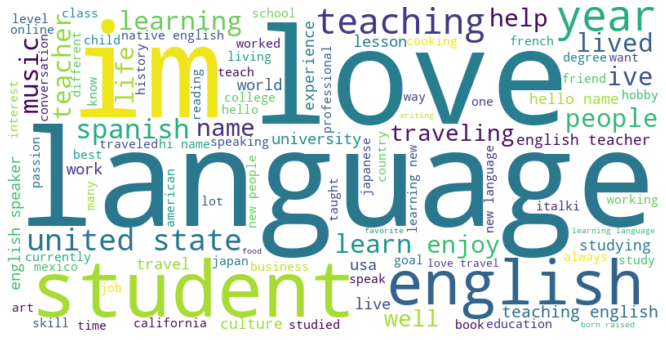

In [40]:
# show
plt.figure(figsize=(12, 6))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

## Sentiment Analysis

- Sentiment analysis refers to the use of natural language processing, text analysis, and computational linguistics to identify emotional states and subjective information.

- Using sentiment analysis, we can gain information about the attitude of the speaker or writer of text with respect to the topic. 

- Today we will just call the [sentiment analysis API](https://textblob.readthedocs.io/en/dev/quickstart.html#sentiment-analysis) from TextBlob and take it like a black box as we haven't talked about machine learning yet.

- We want to apply the function to the text column of the dataframe and generate two new columns called polarity and subjectivity. The process will take a long time so we will apply it to a sample of dataset.
    - Polarity refers to the emotions expressed in the text.
    - Subjectivity is a measure of how subjective vs objective the text is.

- Let's use sentiment analysis to analyze the relationship between polarity and number of thumb ups.

In [ ]:
# filter out all posts that have less than 100 upvotes
sa_df = df.loc[df.ups > 100]

In [ ]:
sample_size = 10000

def sentiment_func(x):
    sentiment = TextBlob(x['selftext'])
    x['polarity'] = sentiment.polarity
    x['subjectivity'] = sentiment.subjectivity
    return x

sample = sa_df.sample(sample_size).apply(sentiment_func, axis=1)

In [ ]:
sample.plot.scatter('ups', 'polarity')

# Recommended Resources:

Other advanced libraries in Python that we will cover in the future lectures:

[Spacy](https://spacy.io/)

[Gensim](https://radimrehurek.com/gensim/)